Programming Assignment-2 , Submitted by Jagyansis Jena,EE22M054.
This file will contain all the inferences codes and plots for dataset 1.


1. Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('Solarize_Light2')
import seaborn as sns
sns.set_style('darkgrid')



2.Importing dataset

In [3]:
dataset1=pd.read_csv(r"C:\Users\jagya\Downloads\dataset1.csv",delim_whitespace = False)


In [4]:
dataset1

,feature1,feature2,class
0,-0.452503,-1.382617,1.0
1,0.384316,1.508008,1.0
2,0.981502,1.892409,2.0
3,0.190459,-0.001133,1.0
4,2.672860,2.373958,2.0
...,...,...,...
1995,3.905996,3.739863,2.0
1996,1.165172,-0.596869,1.0
1997,2.966541,4.042952,2.0
1998,0.670143,2.308971,1.0


Extracting features and calculting mean and variance

In [5]:
feature1=dataset1['feature1']
mean1=feature1.mean()
std1=feature1.std()
print(f'The feature1 gaussian distribution has a mean {mean1} and standard deviation {std1}')

The feature1 gaussian distribution has a mean 1.4706953245797103 and standard deviation 1.966503059242465


In [6]:
len(feature1)

2000

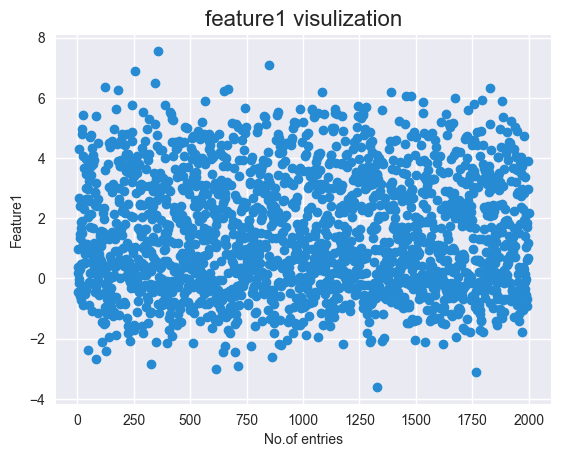

In [7]:
x=range(1,2001)
plt.scatter(x,feature1)
plt.xlabel('No.of entries')
plt.ylabel('Feature1')
plt.title('feature1 visulization')
plt.show()

In [8]:
feature2=dataset1['feature2']
mean2=feature2.mean()
std2=feature2.std()
print(f'The feature1 gaussian distribution has a mean {mean2} and standard deviation {std2}')

The feature1 gaussian distribution has a mean 1.5194829956403246 and standard deviation 1.9343736754170884


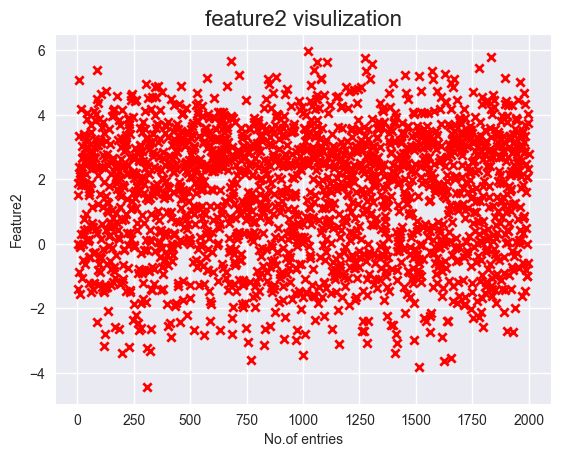

In [9]:
plt.scatter(x,feature2,color='r',marker='x')
plt.xlabel('No.of entries')
plt.ylabel('Feature2')
plt.title('feature2 visulization')
plt.show()

Extracting Labels 

In [10]:
label1=dataset1['class']
label1

0       1.0
1       1.0
2       2.0
3       1.0
4       2.0
       ... 
1995    2.0
1996    1.0
1997    2.0
1998    1.0
1999    2.0
Name: class, Length: 2000, dtype: float64

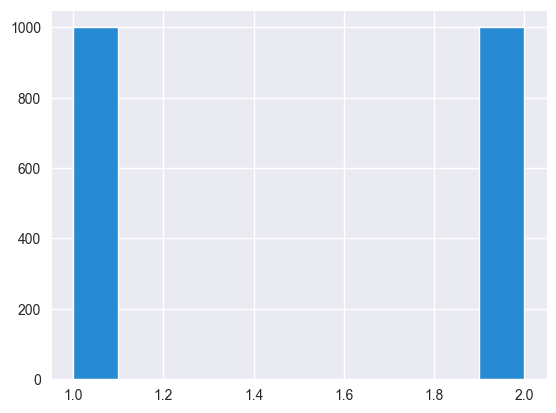

In [11]:
label1.hist()
plt.show()

As we can see here prior probabilty here is 0.5 for each class.

Splitting the features into train test. The ratio we have to maintain is 80:20. We will use sklearn for that.

In [12]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(feature1, label1, test_size = 0.2, random_state = 0)

In [13]:
M1=X1_train.mean()
S1=X1_train.std()

In [14]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(feature2, label1, test_size = 0.2, random_state = 0)

Visualization of training datas

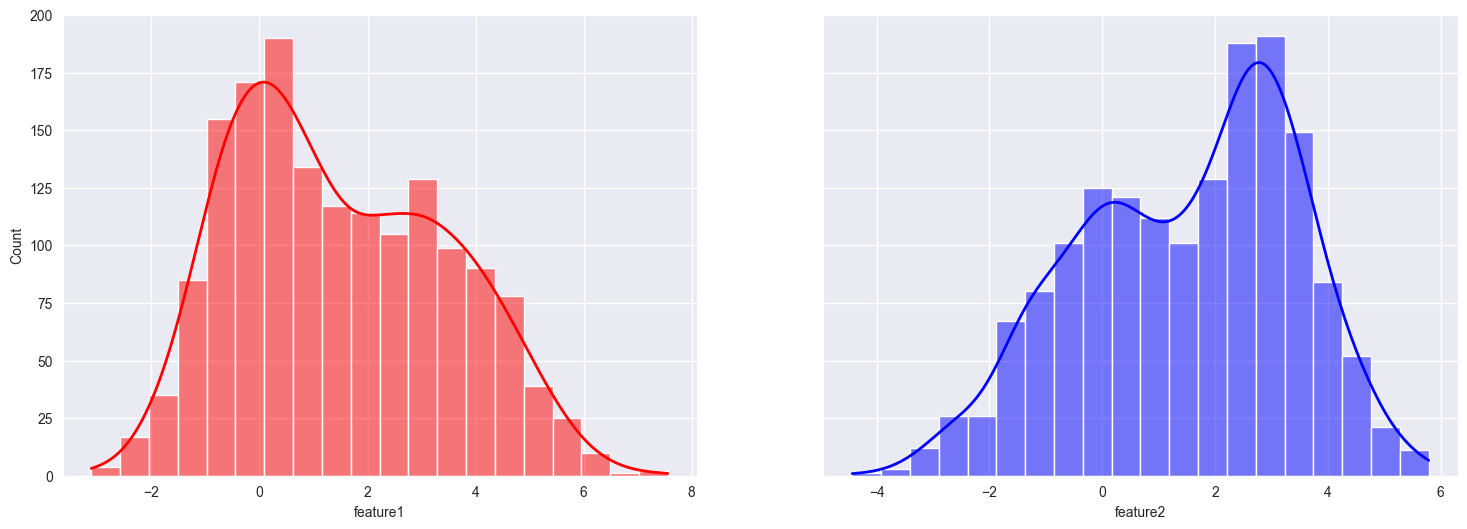

In [15]:
fig,axes=plt.subplots(1,2,figsize=(18,6),sharey=True)
sns.histplot(X1_train,ax=axes[0],kde=True,color='r')
sns.histplot(X2_train,kde=True,color='b')
plt.show()


Inferences- As you can see from the distributions they doses not fit gaussian distribution closely. But we will assume our distribution to be gaussian for simplicity.

Implementation of Naive bayes classifier

We already have seen from histogram that class has probabilty of 0.5.

Making a class of Naive Bayes Classifier

In [16]:
#Naive bayes class
#Dataset redefined to include all the features together
features=dataset1.iloc[:,:-1].values
labels=dataset1.iloc[:,-1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 0)


In [17]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [18]:
nb=NaiveBayes()

Fitting and predicting 

In [19]:
nb.fit(X_train,y_train)


In [20]:
predict=nb.predict(X_test)

Confusion matrix and accuracy score of Gaussian NB for dataset 1

In [21]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_test, predict))
print(f1_score(y_test, predict))

[[192   5]
 [  8 195]]
0.9672544080604534


for Dataset 2

In [22]:
dataset2=pd.read_csv(r"C:\Users\jagya\Downloads\dataset2.csv")
feat=dataset2.iloc[:,:-1].values
labol=dataset2.iloc[:,-1].values

Visulaization of Dataset

In [23]:
dataset2

,feature1,feature2,class
0,-0.764476,1.134969,1.0
1,4.330382,2.922026,2.0
2,2.529467,2.173807,2.0
3,1.864518,2.053912,1.0
4,0.616954,2.006371,2.0
...,...,...,...
1995,-0.310119,1.134157,2.0
1996,5.251734,2.374709,2.0
1997,-1.487168,-1.117711,1.0
1998,0.609774,1.439920,2.0


In [24]:
f11=dataset2['feature1']
mean1=f11.mean()
std1=f11.std()
print(f'The feature1 gaussian distribution has a mean {mean1} and standard deviation {std1}')


The feature1 gaussian distribution has a mean 0.969614064319196 and standard deviation 1.6093033873842435


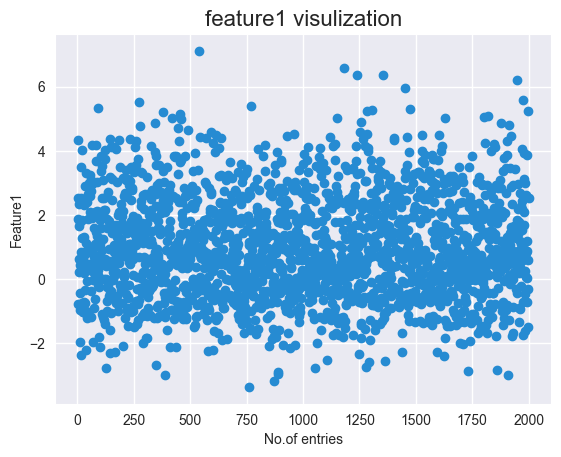

In [25]:
x=range(1,2001)
plt.scatter(x,f11)
plt.xlabel('No.of entries')
plt.ylabel('Feature1')
plt.title('feature1 visulization')
plt.show()

In [26]:
f22=dataset2['feature2']
mean1=f22.mean()
std1=f22.std()
print(f'The feature1 gaussian distribution has a mean {mean1} and standard deviation {std1}')


The feature1 gaussian distribution has a mean 1.0206871043978605 and standard deviation 1.6728811662584926


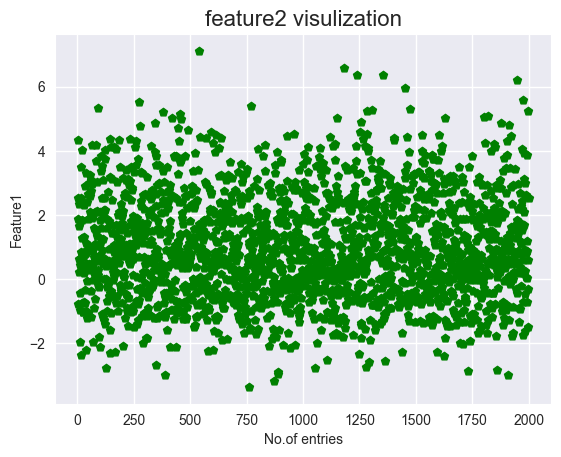

In [27]:
x=range(1,2001)
plt.scatter(x,f11,color='g',marker='p')
plt.xlabel('No.of entries')
plt.ylabel('Feature1')
plt.title('feature2 visulization')
plt.show()

In [28]:
labool=dataset2['class']
labool

0       1.0
1       2.0
2       2.0
3       1.0
4       2.0
       ... 
1995    2.0
1996    2.0
1997    1.0
1998    2.0
1999    2.0
Name: class, Length: 2000, dtype: float64

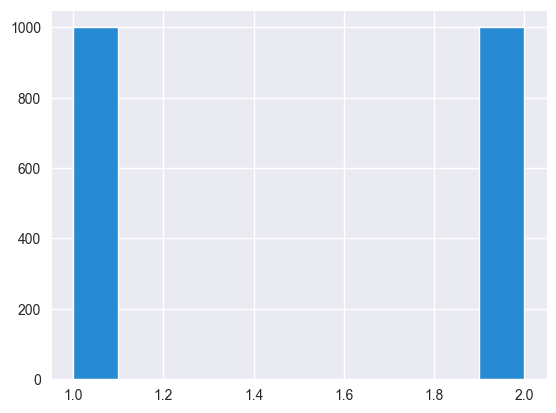

In [29]:
labool.hist()
plt.show()
#Here prior probabilty is 0.5 for each class

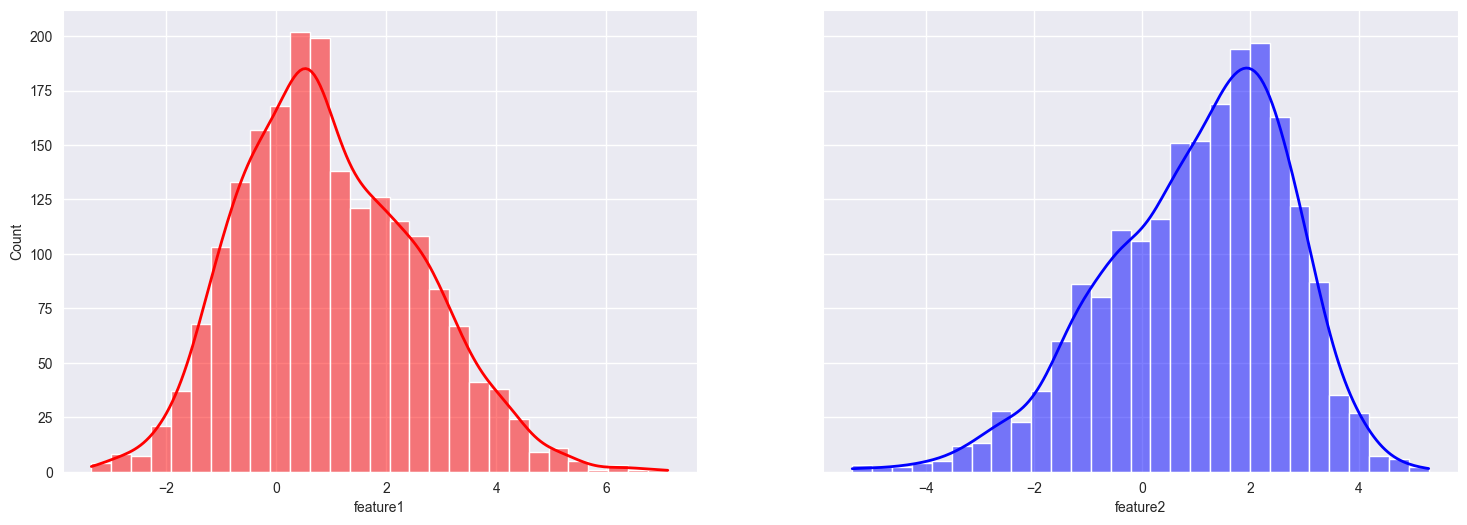

In [30]:
fig,axes=plt.subplots(1,2,figsize=(18,6),sharey=True)
sns.histplot(f11,ax=axes[0],kde=True,color='r')
sns.histplot(f22,kde=True,color='b')
plt.show()


From the data distribution we can say that the shape of features is not so gaussian but we have to treat is as gaussian in gaussian NB

Gaussian NB Classifier

In [31]:
from sklearn.model_selection import train_test_split
X_tra, X_te, y_tra, y_te = train_test_split(feat, labol, test_size = 0.2, random_state = 0)


In [32]:
class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class with the highest posterior
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [33]:
nb= NaiveBayes()
nb.fit(X_tra,y_tra)


In [34]:
predict2=nb.predict(X_te)

Confusion matrix and accuracy score for dataset 2

In [35]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(y_te, predict2))
print(f1_score(y_te, predict2))

[[181  33]
 [ 37 149]]
0.8379629629629631


Contour Plot and decision boundry

Dataset1

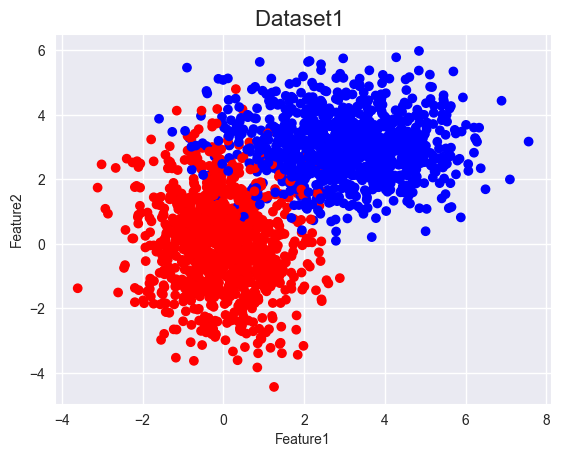

In [41]:
colors = ['r' if label == 1 else 'blue' for label in labels]
#marker_s=['x' if label==1 else 'o' for label in label1]
plt.scatter(feature1,feature2,c=colors)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Dataset1 ')
plt.show()



Dataset2

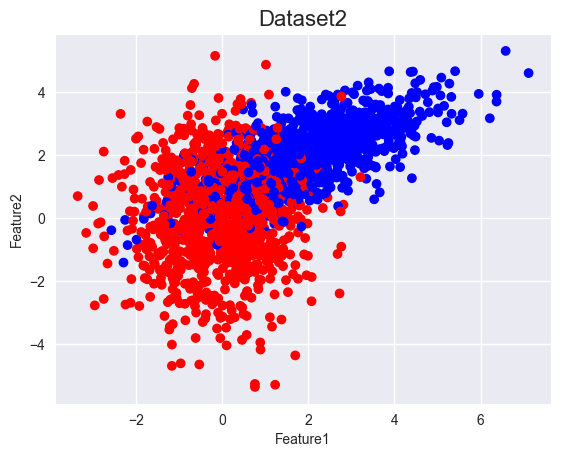

In [37]:
colors = ['r' if label == 1 else 'blue' for label in labool]
#marker_s=['x' if label==1 else 'o' for label in label1]
plt.scatter(f11,f22,c=colors)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Dataset2')
plt.show()

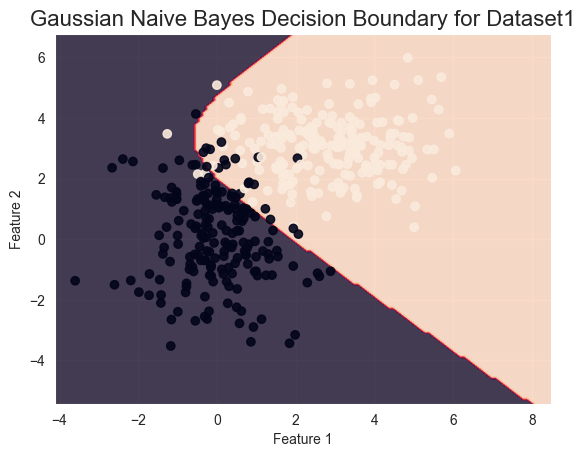

In [38]:
# Decision Boundry plot dataset1 
from matplotlib import cm


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)


plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.9)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes Decision Boundary for Dataset1')

plt.show()


Inferences above- We can clearly see the decision boundry and 13 misclassifications we have got in our case which is consistent with the confusion matrix

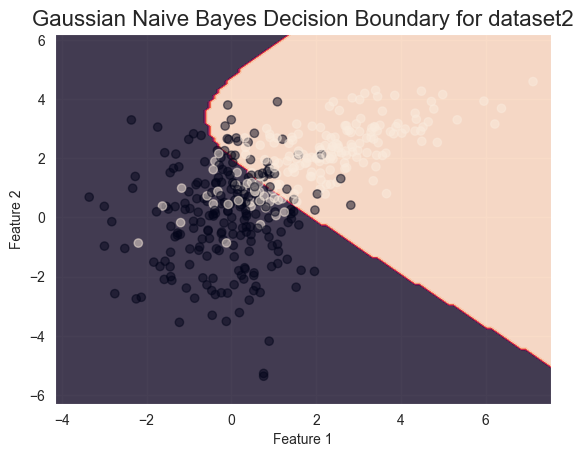

In [39]:
#Decision Boundry for dataset 2 
from matplotlib import cm


x_min, x_max = X_tra[:, 0].min() - 1, X_tra[:, 0].max() + 1
y_min, y_max = X_tra[:, 1].min() - 1, X_tra[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)


plt.scatter(X_te[:, 0], X_te[:, 1], c=y_te, alpha=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes Decision Boundary for dataset2')

plt.show()


In [40]:
# We can see a lot of misclassification in case dataset 2 we can see there is a lot of misclassification as predicted in confusion matrix.

What is the reason for more errors in case of dataset 2 than dataset1?
1. First the Naive gaussian classifier assumes two things which is dataset is gaussian and they are independent of each other which may not be the case here.
2. The correleation between features of dataset 2 is high with respect to dataset 1 so there are more misclassification in case of dataset 2. We can realize this from the plots of features of dataset 1 and dataset 2.